In [1]:
library(ggplot2)
library(naturalsort)
library(stringr)
library(vcfR)
library(data.table)
library(dplyr)


   *****       ***   vcfR   ***       *****
   This is vcfR 1.12.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****



Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
alleles_overall=fread("./alleles.tsv.gz", data.table=FALSE, sep="\t")
head(alleles_overall)

homozygous_gt=fread("./homozygous_gt.csv.gz", data.table=FALSE)
gt=fread("./gt.csv.gz", data.table=FALSE)

,POS,CHROM,alleles
,<int>,<chr>,<chr>
1,33,chromosome1,"CA,C"
2,56,chromosome1,"A,AC"
3,63,chromosome1,"T,C"
4,65,chromosome1,"CTA,C"
5,71,chromosome1,"CTACCCTAA,C"
6,83,chromosome1,"AG,A"


In [3]:
files=dir(path = "figures", pattern="-OppositeHomo.csv$", full.names = TRUE)
files

[1] "figures/ACKxACV-data-MQ60-cov50_76-DP50-OppositeHomo.csv"    
[2] "figures/ACPxBFP-data-MQ60-cov39_92-DP39-OppositeHomo.csv"    
[3] "figures/AKExBAH-data-MQ60-cov69_111.7-DP69-OppositeHomo.csv" 
[4] "figures/ANGxCEI-data-MQ60-cov64_87-DP64-OppositeHomo.csv"    
[5] "figures/ATExYCR-data-MQ60-cov44_95-DP44-OppositeHomo.csv"    
[6] "figures/BAHxCGD-data-MQ60-cov54_79-DP54-OppositeHomo.csv"    
[7] "figures/BAPxCMP-data-MQ60-cov71_111-DP71-OppositeHomo.csv"   
[8] "figures/CCDxCPG-data-MQ60-cov63.3_98-DP63.3-OppositeHomo.csv"

In [4]:
vcfs=dir(path = "ceberlein_data", pattern="vcf.m2M3-snps.vcf.gz$", full.names = TRUE)
vcfs

[1] "ceberlein_data/1_ACPxBFP.vcf.m2M3-snps.vcf.gz"
[2] "ceberlein_data/2_BAPxCMP.vcf.m2M3-snps.vcf.gz"
[3] "ceberlein_data/3_CCDxCPG.vcf.m2M3-snps.vcf.gz"
[4] "ceberlein_data/4_ATExYCR.vcf.m2M3-snps.vcf.gz"
[5] "ceberlein_data/5_ACKxACV.vcf.m2M3-snps.vcf.gz"
[6] "ceberlein_data/6_AKExBAH.vcf.m2M3-snps.vcf.gz"
[7] "ceberlein_data/7_BAHxCGD.vcf.m2M3-snps.vcf.gz"
[8] "ceberlein_data/8_ANGxCEI.vcf.m2M3-snps.vcf.gz"

In [5]:
vcf <- read.vcfR(vcfs[7], verbose = FALSE )

In [6]:
REF=vcfR::getREF(vcf)
ALTS=vcfR::getALT(vcf)

In [7]:
alleles=data.frame(POS=vcfR::getPOS(vcf), CHROM=vcfR::getCHROM(vcf),GT=vcfR::extract.gt(vcf)[,1],alleles_of_cross=paste(REF,ALTS,sep=","), stringsAsFactors = FALSE)

In [8]:
head(alleles)

,POS,CHROM,GT,alleles_of_cross
,<int>,<chr>,<chr>,<chr>
chromosome1_167,167,chromosome1,0/1,"A,C"
chromosome1_192,192,chromosome1,0/1,"C,T"
chromosome1_588,588,chromosome1,0/1,"C,A"
chromosome1_595,595,chromosome1,0/1,"C,G"
chromosome1_596,596,chromosome1,0/1,"A,C"
chromosome1_602,602,chromosome1,0/1,"C,T"


In [10]:
file=files[6]

In [11]:
cross=strsplit(basename(file),"-")[[1]][1]

getColsInGTfile=function(x){
    return(colnames(homozygous_gt)[grepl(x,colnames(homozygous_gt))])
}

colsGT=unlist(lapply(strsplit(cross,"x")[[1]], getColsInGTfile))
    
    if(length(colsGT)>2){
        stop()
    }
    
homozygous_gt_cross=homozygous_gt[,c("POS","CHROM",colsGT)]
gt_cross=gt[,c("POS","CHROM",colsGT)]

In [12]:
gt_cross=left_join(gt_cross,alleles_overall)
head(gt_cross)

Joining, by = c("POS", "CHROM")



,POS,CHROM,BAH,CGD,alleles
,<int>,<chr>,<chr>,<chr>,<chr>
1,33,chromosome1,,,"CA,C"
2,56,chromosome1,,,"A,AC"
3,63,chromosome1,,,"T,C"
4,65,chromosome1,,,"CTA,C"
5,71,chromosome1,,,"CTACCCTAA,C"
6,83,chromosome1,,,"AG,A"


In [13]:
df=fread(file, data.table = FALSE)

In [14]:
df=left_join(df, gt_cross)
head(df)

Joining, by = c("POS", "CHROM")



,POS,CHROM,AF,MQ,BAHxCGD_1,POS_scale,MQ_scale,MQ_scale2,OppositeHomo,BAH,CGD,alleles
,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<chr>
1,10025,chromosome1,0.6790123,60,162,0.04366118,5.067438,0.5280471,TRUE,0/0,1/1,"G,A,T"
2,10064,chromosome1,0.6497175,60,177,0.04383103,5.067438,0.5280471,TRUE,0/0,1/1,"G,A"
3,10088,chromosome1,0.6300578,60,173,0.04393556,5.067438,0.5280471,TRUE,0/0,1/1,"A,G"
4,10103,chromosome1,0.6329114,60,158,0.04400089,5.067438,0.5280471,TRUE,0/0,1/1,"G,A"
5,10106,chromosome1,0.3600000,60,150,0.04401395,5.067438,0.5280471,TRUE,1/1,0/0,"A,G"
6,10158,chromosome1,0.6666667,60,135,0.04424043,5.067438,0.5280471,TRUE,0/0,1/1,"A,G"


In [15]:
df=left_join(df, alleles)
head(df)

Joining, by = c("POS", "CHROM")



,POS,CHROM,AF,MQ,BAHxCGD_1,POS_scale,MQ_scale,MQ_scale2,OppositeHomo,BAH,CGD,alleles,GT,alleles_of_cross
,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,10025,chromosome1,0.6790123,60,162,0.04366118,5.067438,0.5280471,TRUE,0/0,1/1,"G,A,T",0/1,"G,A"
2,10064,chromosome1,0.6497175,60,177,0.04383103,5.067438,0.5280471,TRUE,0/0,1/1,"G,A",0/1,"G,A"
3,10088,chromosome1,0.6300578,60,173,0.04393556,5.067438,0.5280471,TRUE,0/0,1/1,"A,G",0/1,"A,G"
4,10103,chromosome1,0.6329114,60,158,0.04400089,5.067438,0.5280471,TRUE,0/0,1/1,"G,A",0/1,"G,A"
5,10106,chromosome1,0.3600000,60,150,0.04401395,5.067438,0.5280471,TRUE,1/1,0/0,"A,G",0/1,"A,G"
6,10158,chromosome1,0.6666667,60,135,0.04424043,5.067438,0.5280471,TRUE,0/0,1/1,"A,G",0/1,"A,G"


In [16]:
head(df)

,POS,CHROM,AF,MQ,BAHxCGD_1,POS_scale,MQ_scale,MQ_scale2,OppositeHomo,BAH,CGD,alleles,GT,alleles_of_cross
,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,10025,chromosome1,0.6790123,60,162,0.04366118,5.067438,0.5280471,TRUE,0/0,1/1,"G,A,T",0/1,"G,A"
2,10064,chromosome1,0.6497175,60,177,0.04383103,5.067438,0.5280471,TRUE,0/0,1/1,"G,A",0/1,"G,A"
3,10088,chromosome1,0.6300578,60,173,0.04393556,5.067438,0.5280471,TRUE,0/0,1/1,"A,G",0/1,"A,G"
4,10103,chromosome1,0.6329114,60,158,0.04400089,5.067438,0.5280471,TRUE,0/0,1/1,"G,A",0/1,"G,A"
5,10106,chromosome1,0.3600000,60,150,0.04401395,5.067438,0.5280471,TRUE,1/1,0/0,"A,G",0/1,"A,G"
6,10158,chromosome1,0.6666667,60,135,0.04424043,5.067438,0.5280471,TRUE,0/0,1/1,"A,G",0/1,"A,G"


In [17]:
df$OriginAlleleLeft=NA
df$OriginAlleleRight=NA

In [18]:
getAlleleNumeric=function(x, which){
    return(as.numeric(strsplit(x,"/",fixed = TRUE)[[1]][which]))
}
getAlleleCharacter1=function(x){
    which=df$Numeric1[x]
    return(strsplit(df$alleles_of_cross[x],",",fixed = TRUE)[[1]][which+1])
    }
getAlleleCharacter2=function(x){
    which=df$Numeric2[x]
    return(strsplit(df$alleles_of_cross[x],",",fixed = TRUE)[[1]][which+1])
    }



getAlleleNumericIn1k=function(x){
    which=df$Char1[x]
    if(which %in% strsplit(df$alleles[x],",",fixed = TRUE)[[1]])
        {
        return(which(strsplit(df$alleles[x],",",fixed = TRUE)[[1]] == which)-1)
    }
    
    return(NA)
}
getAlleleNumericIn1k2=function(x){
    which=df$Char2[x]
    if(which %in% strsplit(df$alleles[x],",",fixed = TRUE)[[1]])
        {
        return(which(strsplit(df$alleles[x],",",fixed = TRUE)[[1]] == which)-1)
    }
    
    return(NA)
}
getWhichOriginPopulation=function(x){
    which=df$Num1k1[x]
    if(is.na(which)){
        return(NA)
    }
    #print(substr(df[x,10],1,1))
    if(substr(df[x,10],1,1)==which){
        return(0)
    }
    if(substr(df[x,11],1,1)==which){
        return(1)
    }
    return(NA)
}
getWhichOriginPopulation2=function(x){
    which=df$Num1k2[x]
    if(is.na(which)){
        return(NA)
    }
    #print(substr(df[x,10],1,1))
    if(substr(df[x,10],3,3)==which){
        return(0)
    }
    if(substr(df[x,11],3,3)==which){
        return(1)
    }
    return(NA)
}

In [19]:
df$Numeric1=0
df$Numeric2=1



In [20]:
df$Char1=unlist(lapply(1:nrow(df), getAlleleCharacter1))
df$Char2=unlist(lapply(1:nrow(df), getAlleleCharacter2))

In [21]:
df$Num1k1=unlist(lapply(1:nrow(df), getAlleleNumericIn1k))
df$Num1k2=unlist(lapply(1:nrow(df), getAlleleNumericIn1k2))

In [22]:
df$OriginAlleleLeft=unlist(lapply(1:nrow(df), getWhichOriginPopulation))
df$OriginAlleleRight=unlist(lapply(1:nrow(df), getWhichOriginPopulation2))

In [23]:
head(df[,1:16])

,POS,CHROM,AF,MQ,BAHxCGD_1,POS_scale,MQ_scale,MQ_scale2,OppositeHomo,BAH,CGD,alleles,GT,alleles_of_cross,OriginAlleleLeft,OriginAlleleRight
,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,10025,chromosome1,0.6790123,60,162,0.04366118,5.067438,0.5280471,TRUE,0/0,1/1,"G,A,T",0/1,"G,A",0,1
2,10064,chromosome1,0.6497175,60,177,0.04383103,5.067438,0.5280471,TRUE,0/0,1/1,"G,A",0/1,"G,A",0,1
3,10088,chromosome1,0.6300578,60,173,0.04393556,5.067438,0.5280471,TRUE,0/0,1/1,"A,G",0/1,"A,G",0,1
4,10103,chromosome1,0.6329114,60,158,0.04400089,5.067438,0.5280471,TRUE,0/0,1/1,"G,A",0/1,"G,A",0,1
5,10106,chromosome1,0.3600000,60,150,0.04401395,5.067438,0.5280471,TRUE,1/1,0/0,"A,G",0/1,"A,G",1,0
6,10158,chromosome1,0.6666667,60,135,0.04424043,5.067438,0.5280471,TRUE,0/0,1/1,"A,G",0/1,"A,G",0,1


In [25]:
df$AF_new=df$AF
df$AF_new[df$OriginAlleleRight==0 & !is.na(df$OriginAlleleRight)]=1-df$AF[df$OriginAlleleRight==0 & !is.na(df$OriginAlleleRight)]
df$AF_new[is.na(df$OriginAlleleRight)]=NA

Warning message:
"Removed 518 rows containing missing values (geom_point)."


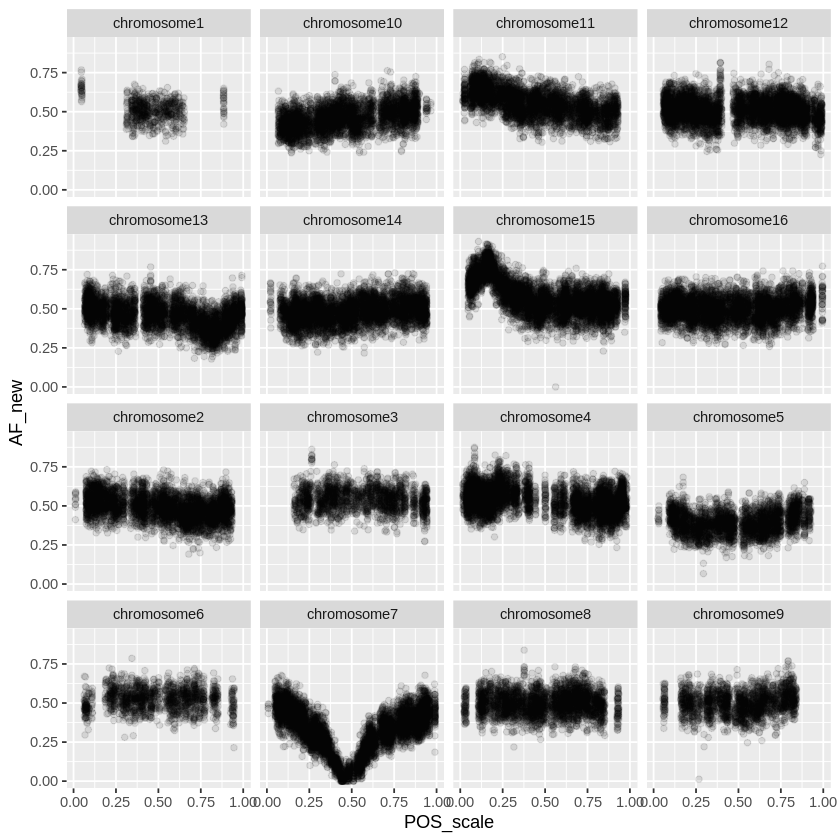

In [26]:
ggplot(df, aes(POS_scale,AF_new))+
geom_point(alpha=0.1)+
    facet_wrap(~CHROM)